(500, 1)
[0.00383127]
(500, 1)
[0.00039083]


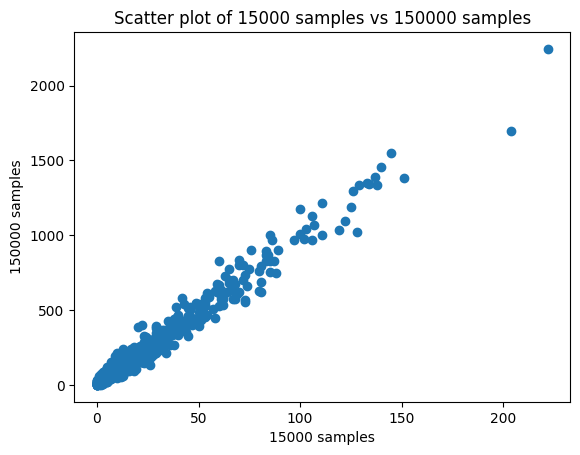

In [71]:
import numpy as np
import matplotlib.pyplot as plt


with open('q.tsv') as f:
    data_q = f.read().splitlines()
data_q = np.array([list(map(float, line.split('\t'))) for line in data_q])
print(data_q.shape)
print(data_q[1])

with open('p.tsv') as f:
    data_p = f.read().splitlines()

data_p = np.array([list(map(float, line.split('\t'))) for line in data_p])
print(data_p.shape)
print(data_p[1])



datap = np.squeeze(data_p)
dataq = np.squeeze(data_q)
#creating three different samples using random sampling and replacement
sample1 = np.random.multinomial(15000, datap)
sample2 = np.random.multinomial(30000, datap)
sample3 = np.random.multinomial(150000, datap)

merged_samples = np.vstack((sample1, sample2, sample3))
# print(merged_samples.shape)

#plotting a scatter plot of 15000 samples vs 150000 samples
plt.scatter(sample1, sample3)
plt.xlabel('15000 samples')
plt.ylabel('150000 samples')
plt.title('Scatter plot of 15000 samples vs 150000 samples')


plt.show()

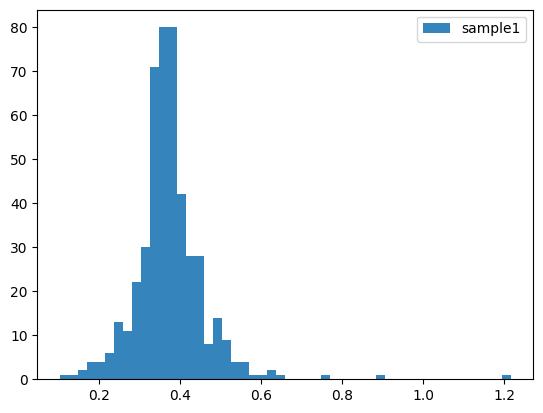

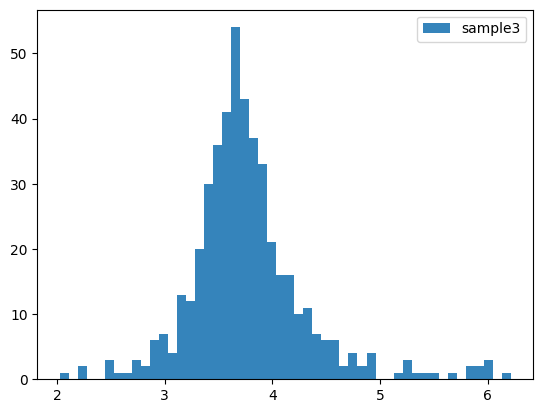

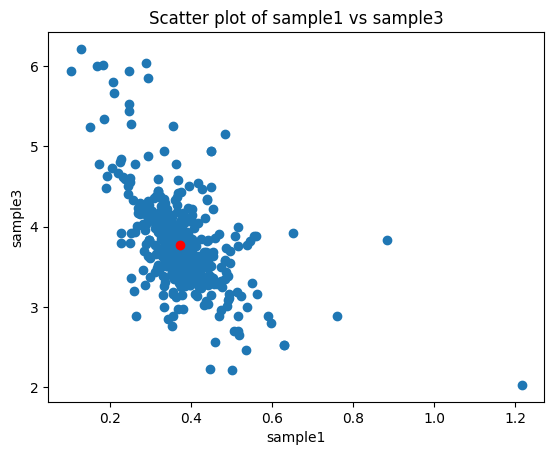

Coordinates of the scatter plot are 0.3735794896075523 3.776936544895664
[0.3620257  0.73287293 3.68307943]


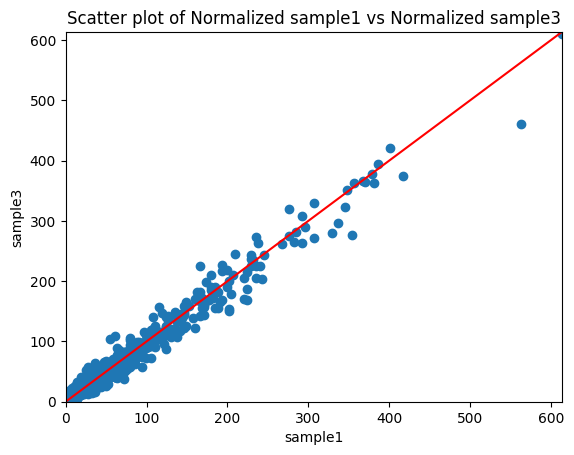

In [72]:

#Defining the DESeq normalization function
def DESeq_normalization(samples):
    num_samples, num_genes = samples.shape
    Sjg_hat = np.zeros((num_samples, num_genes))
    denominator = np.ones(num_genes)
    Sj_hat = np.ones(num_genes)
    for i in range(num_genes):
        for j in range(num_samples):
            denominator[i] *= samples[j][i]
    
    for i in range(num_genes):
        for j in range(num_samples):
            if(denominator[i] == 0):
                Sjg_hat[j][i] = 0
            else:
                Sjg_hat[j][i] = samples[j][i] / denominator[i]**(1/num_samples)
    Sj_hat = np.median(Sjg_hat, axis=1)
    return Sjg_hat, Sj_hat




Sjg_hat, Sj_hat= DESeq_normalization(merged_samples)
#removing all zero values
Sjg_hat = Sjg_hat[:, np.all(Sjg_hat != 0, axis=0)]



#histogram for sample 1 and sample 3
plt.figure(1)
plt.hist(Sjg_hat[0], bins=50, alpha=0.9, label='sample1')
plt.legend(loc='upper right')
plt.show()


plt.figure(2)
plt.hist(Sjg_hat[2], bins=50, alpha=0.9, label='sample3')
plt.legend(loc='upper right')
plt.show()


#scatterplot for sample 1 and sample 3 
# Calculate the center coordinates
center_x = np.mean(Sjg_hat[0])
center_y = np.mean(Sjg_hat[2])

plt.figure(3)
plt.scatter(Sjg_hat[0], Sjg_hat[2])
plt.scatter(center_x, center_y, color='red')  # Plot the center as a red dot
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of sample1 vs sample3')

# Show the plot
plt.show()
print("Coordinates of the scatter plot are", center_x, center_y)

#Normalization
Normalized1 = Sjg_hat[0]/Sj_hat[0]
Normalized2 = Sjg_hat[1]/Sj_hat[1]
Normalized3 = Sjg_hat[2]/Sj_hat[2]
Normalized = np.vstack((Normalized1, Normalized2, Normalized3))
print(Sj_hat)

#scatterplot for sample 1 and sample 3 with red y = x line 


plt.figure(4)
plt.scatter(sample1/Sj_hat[0], sample3/Sj_hat[2])
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of Normalized sample1 vs Normalized sample3')
max_val = max(max(sample1/Sj_hat[0]), max(sample3/Sj_hat[2]))
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.plot([0, max_val], [0, max_val], color='red')

plt.show()



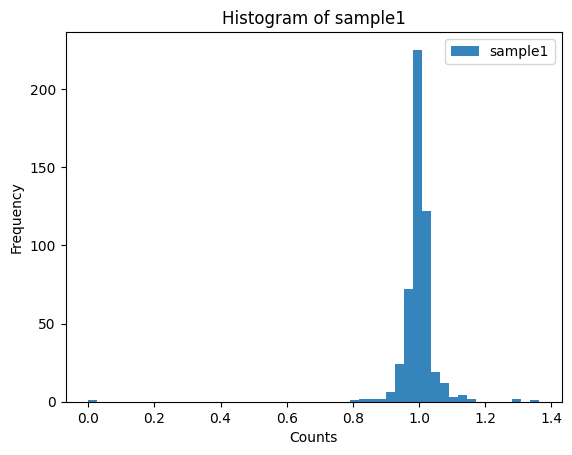

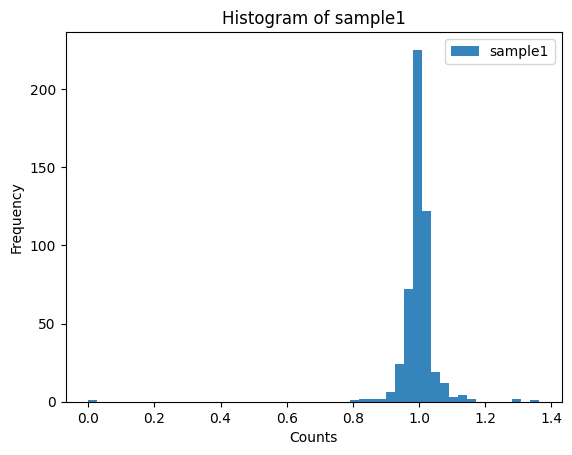

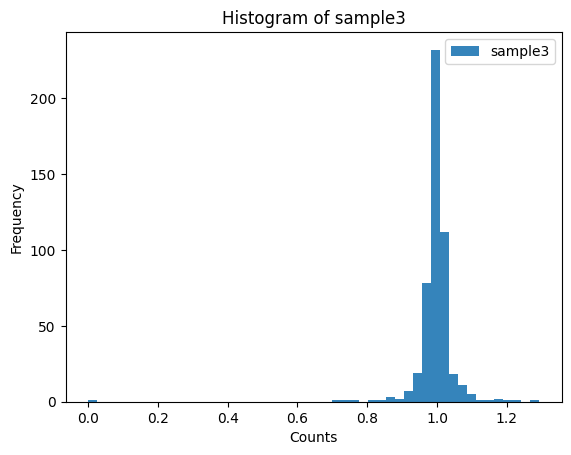

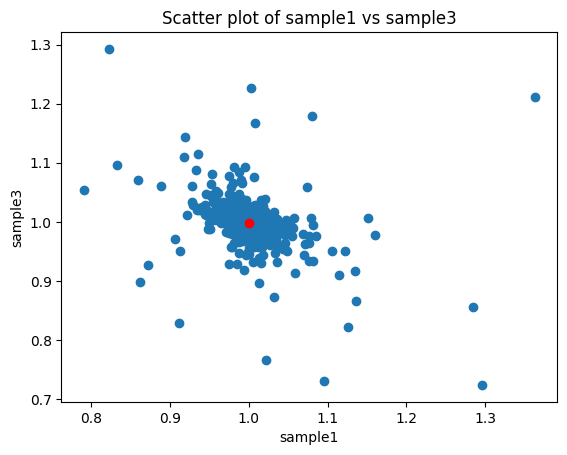

Center coordinates are:  1.000915128792109 0.99870295708814


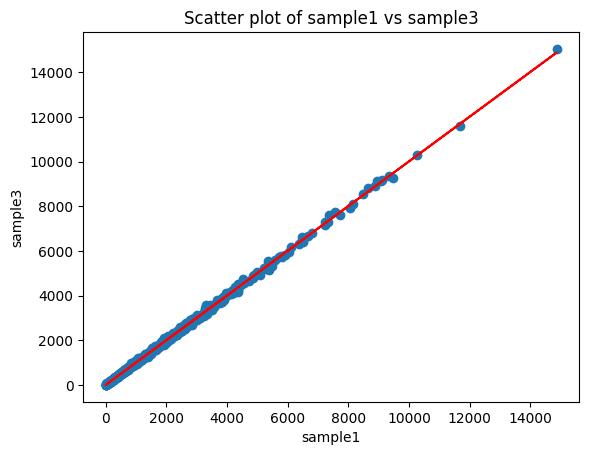

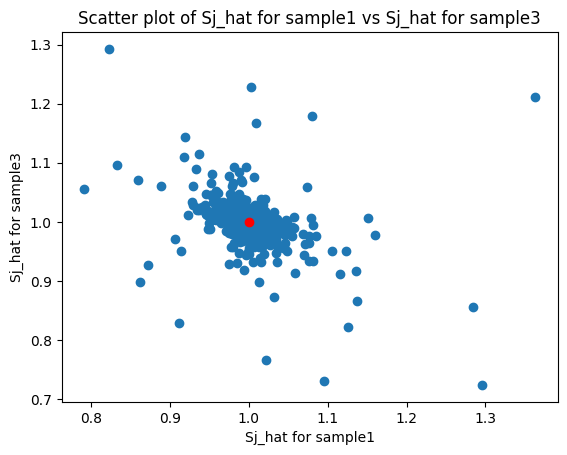

In [77]:
# Generate samples
#setting seed
np.random.seed(0)
sample1 = np.random.multinomial(1000000, datap)
sample2 = np.random.multinomial(1000000, datap)
sample3 = np.random.multinomial(1000000, datap)

# Merge samples
merged_control = np.vstack((sample1, sample2, sample3))

# Perform DESeq normalization
Sjg_hat, Sj_hat = DESeq_normalization(merged_control)

#plotting Sjhats for sample 1 
plt.figure(1)
plt.hist(Sjg_hat[0], bins=50, alpha=0.9, label='sample1')
plt.legend(loc='upper right')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram of sample1')
plt.show()


# Remove NaN and inf values
Sjg_hat = np.nan_to_num(Sjg_hat)

# Histogram for sample 1 and sample 3
plt.figure(1)
plt.hist(Sjg_hat[0], bins=50, alpha=0.9, label='sample1')
plt.legend(loc='upper right')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram of sample1')
plt.show()

plt.figure(2)
plt.hist(Sjg_hat[2], bins=50, alpha=0.9, label='sample3')
plt.legend(loc='upper right')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram of sample3')
plt.show()

# Scatterplot for sample 1 and sample 3
plt.figure(3)
Sjg_hat_nonzero = Sjg_hat[:, (Sjg_hat[0] != 0) & (Sjg_hat[2] != 0)]
Sjg_hat = Sjg_hat[:, (Sjg_hat[0] != 0) & (Sjg_hat[2] != 0)]

# Calculate the center coordinates
center_x = np.mean(Sjg_hat_nonzero[0])
center_y = np.mean(Sjg_hat_nonzero[2])

plt.scatter(Sjg_hat_nonzero[0], Sjg_hat_nonzero[2])
plt.scatter(center_x, center_y, color='red')  # Plot the center as a red dot
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of sample1 vs sample3')
plt.show()

print("Center coordinates are: ", center_x, center_y)

# Normalization
Normalized1 = Sjg_hat[0] / Sj_hat[0]
Normalized3 = Sjg_hat[2] / Sj_hat[2]


plt.figure(5)
plt.scatter(sample1, sample3)
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of sample1 vs sample3')
#line of best fit plotted red
m, b = np.polyfit(sample1, sample3, 1)
plt.plot(sample1, m*sample1 + b, color='red')



plt.show()

#scatterplot for sj_hat for sample 1 and sample 3
median = np.median(Sjg_hat, axis=1)

plt.figure(6)
plt.scatter(Sjg_hat[0], Sjg_hat[2])
plt.xlabel('Sj_hat for sample1')
plt.ylabel('Sj_hat for sample3')
plt.title('Scatter plot of Sj_hat for sample1 vs Sj_hat for sample3')
#plotting median values 
plt.scatter(median[0], median[2], color='red')


plt.show()



#Printing coordinates of the scatter plot




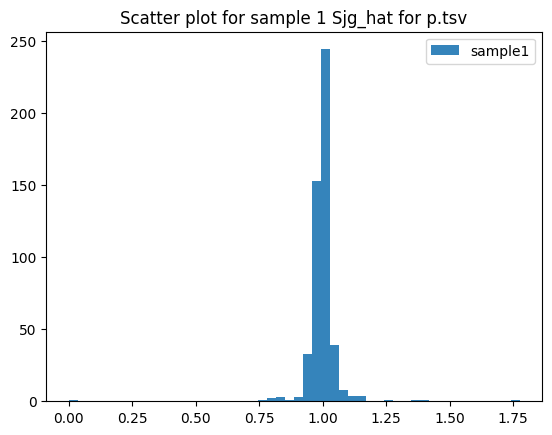

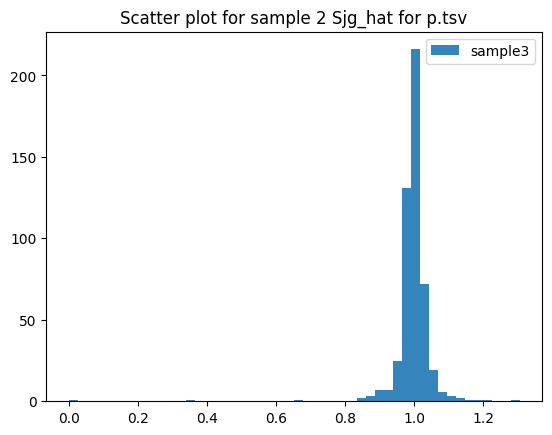

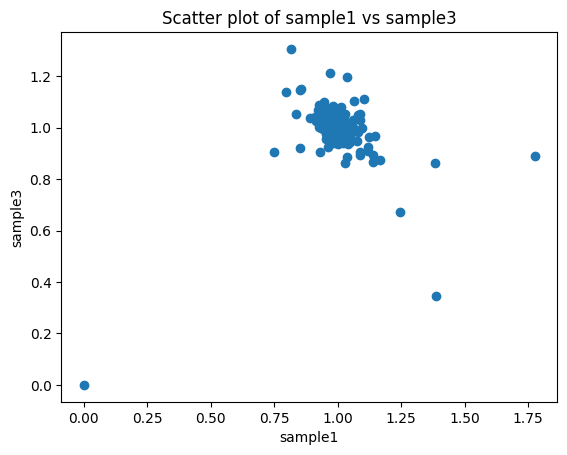

[1.00039341 0.99984016 0.99976894]


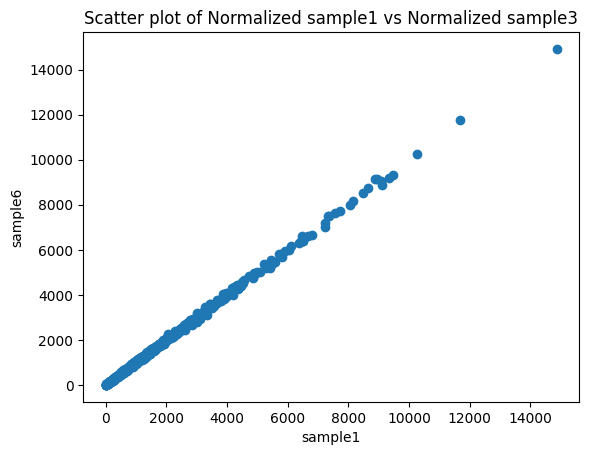

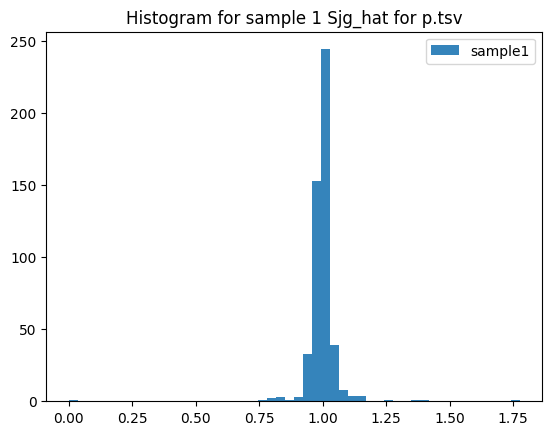

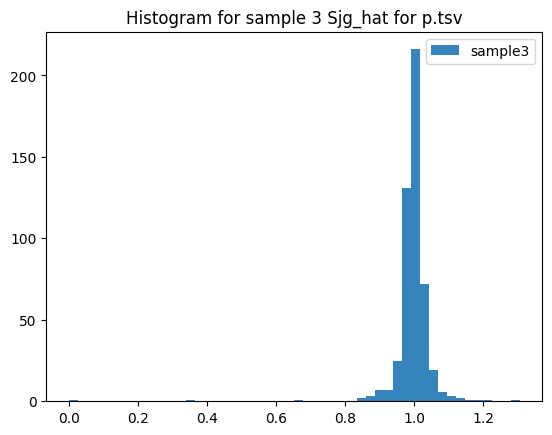

In [74]:
sample4 = np.random.multinomial(1000000, datap)
sample5 = np.random.multinomial(1000000, datap)
sample6= np.random.multinomial(1000000, datap)


merged_experiment = np.vstack((sample4, sample5, sample6))

def DESeq_normalization(samples):
    num_samples, num_genes = samples.shape
    Sjg_hat = np.zeros((num_samples, num_genes))
    denominator = np.ones(num_genes)
    Sj_hat = np.ones(num_genes)
    for i in range(num_genes):
        for j in range(num_samples):
            denominator[i] *= samples[j][i]
    
    for i in range(num_genes):
        for j in range(num_samples):
            if(denominator[i] == 0):
                Sjg_hat[j][i] = 0
            else:
                Sjg_hat[j][i] = samples[j][i] / denominator[i]**(1/num_samples)
                if(j == 2):
                    Sj_hat = np.median(Sjg_hat, axis=1)
    return Sjg_hat, Sj_hat




Sjg_hat2, Sj_hat2= DESeq_normalization(merged_experiment)
#removing NaN and inf values


#histogram for sample 1 and sample 3
plt.figure(1)
plt.title("Scatter plot for sample 1 Sjg_hat for p.tsv")
plt.hist(Sjg_hat2[0], bins=50, alpha=0.9, label='sample1')
plt.legend(loc='upper right')
plt.show()


plt.figure(2)
plt.title("Scatter plot for sample 2 Sjg_hat for p.tsv")
plt.hist(Sjg_hat2[2], bins=50, alpha=0.9, label='sample3')
plt.legend(loc='upper right')
plt.show()


#scatterplot for sample 1 and sample 3
center_x = np.mean(Sjg_hat[0])
center_y = np.mean(Sjg_hat[2])
plt.figure(3)
plt.scatter(Sjg_hat2[0], Sjg_hat2[2])
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of sample1 vs sample3')
plt.show()

#Normalization
Normalized1_2 = Sjg_hat2[0]/Sj_hat2[0]
Normalized2_2 = Sjg_hat2[1]/Sj_hat2[1]
Normalized3_2 = Sjg_hat2[2]/Sj_hat2[2]
Normalized_2 = np.vstack((Normalized1_2, Normalized2_2, Normalized3_2))
print(Sj_hat2)

#scatterplot for sample 1 and sample 3

plt.figure(4)
plt.scatter(  sample1/Sj_hat[0], sample6/Sj_hat2[2])
plt.xlabel('sample1')
plt.ylabel('sample6')
plt.title('Scatter plot of Normalized sample1 vs Normalized sample3')
plt.show()

#printing the histograms for the samples above
plt.figure(5)
plt.hist(Sjg_hat2[0], bins=50, alpha=0.9, label='sample1')
plt.title("Histogram for sample 1 Sjg_hat for p.tsv")
plt.legend(loc='upper right')
plt.show()

plt.figure(6)
plt.hist(Sjg_hat2[2], bins=50, alpha=0.9, label='sample3')
plt.title("Histogram for sample 3 Sjg_hat for p.tsv")
plt.legend(loc='upper right')
plt.show()



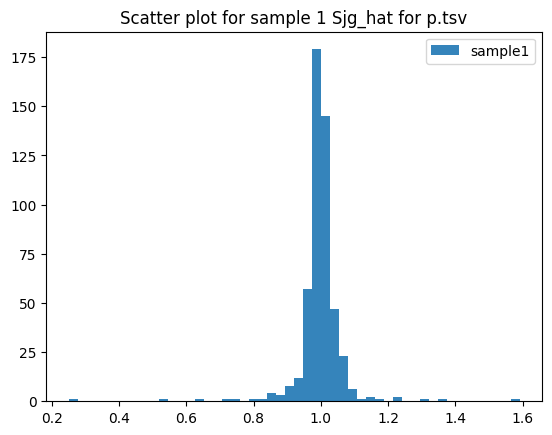

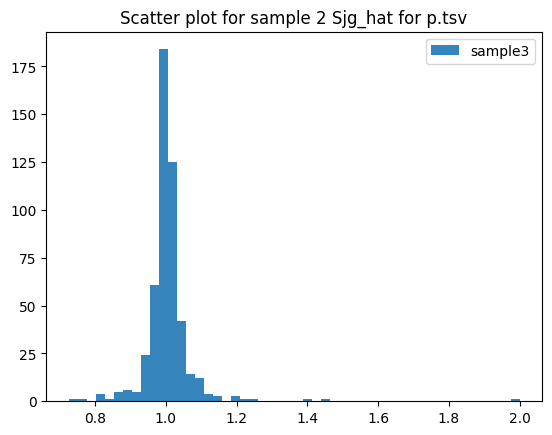

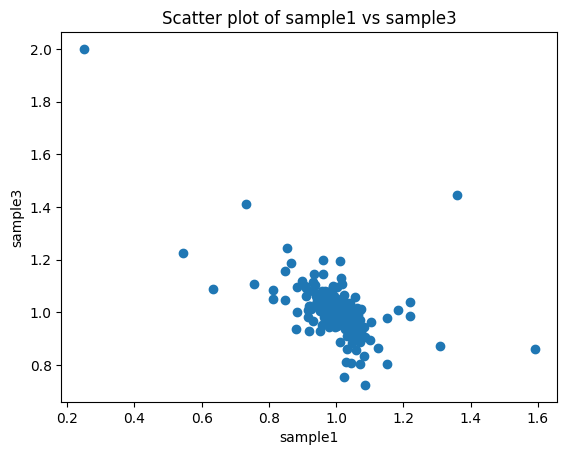

[0.99867648 1.00121215 1.00048265]


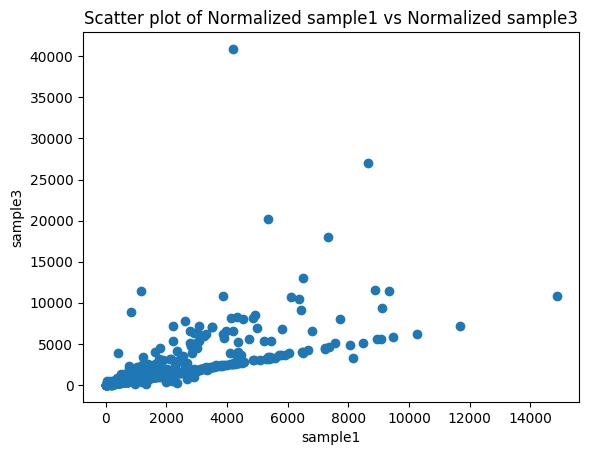

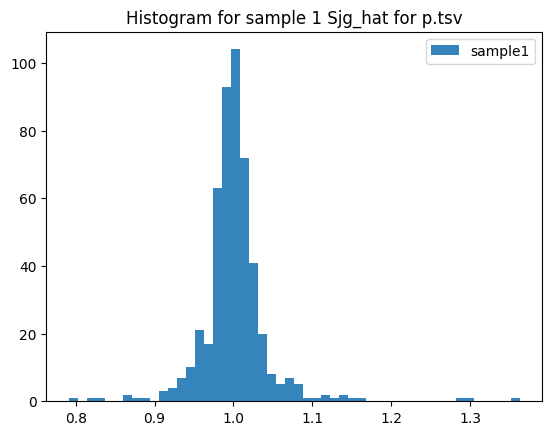

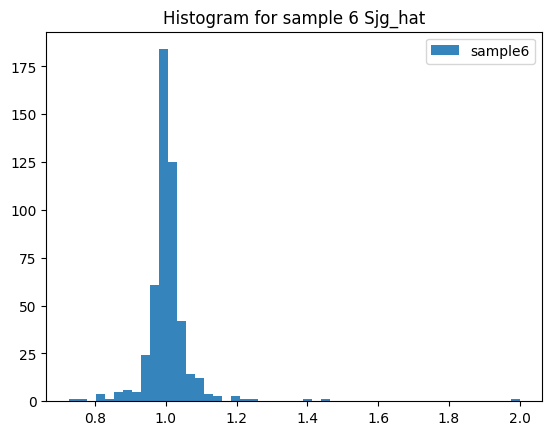

In [75]:
sample4 = np.random.multinomial(1000000, dataq)
sample5 = np.random.multinomial(1000000, dataq)
sample6= np.random.multinomial(1000000, dataq)


merged_samples2 = np.vstack((sample4, sample5, sample6))



Sjg_hat2, Sj_hat2= DESeq_normalization(merged_samples2)
#removing NaN and inf values


#histogram for sample 1 and sample 3
plt.figure(1)
plt.title("Scatter plot for sample 1 Sjg_hat for p.tsv")
plt.hist(Sjg_hat2[0], bins=50, alpha=0.9, label='sample1')
plt.legend(loc='upper right')
plt.show()


plt.figure(2)
plt.title("Scatter plot for sample 2 Sjg_hat for p.tsv")
plt.hist(Sjg_hat2[2], bins=50, alpha=0.9, label='sample3')
plt.legend(loc='upper right')
plt.show()


#scatterplot for sample 1 and sample 3
center_x = np.mean(Sjg_hat[0])
center_y = np.mean(Sjg_hat[2])
plt.figure(3)
plt.scatter(Sjg_hat2[0], Sjg_hat2[2])
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of sample1 vs sample3')
plt.show()

#Normalization
Normalized1_2 = Sjg_hat2[0]/Sj_hat2[0]
Normalized2_2 = Sjg_hat2[1]/Sj_hat2[1]
Normalized3_2 = Sjg_hat2[2]/Sj_hat2[2]
Normalized_2 = np.vstack((Normalized1_2, Normalized2_2, Normalized3_2))
print(Sj_hat2)

#scatterplot for sample 1 and sample 3

plt.figure(4)
plt.scatter(  sample1/Sj_hat[0], sample6/Sj_hat2[2])
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of Normalized sample1 vs Normalized sample3')
plt.show()

#printing the histograms for the samples above
plt.figure(5)
plt.hist(Sjg_hat[0], bins=50, alpha=0.9, label='sample1')
plt.title("Histogram for sample 1 Sjg_hat for p.tsv")
plt.legend(loc='upper right')
plt.show()

plt.figure(6)
plt.hist(Sjg_hat2[2], bins=50, alpha=0.9, label='sample6')
plt.title("Histogram for sample 6 Sjg_hat")
plt.legend(loc='upper right')
plt.show()



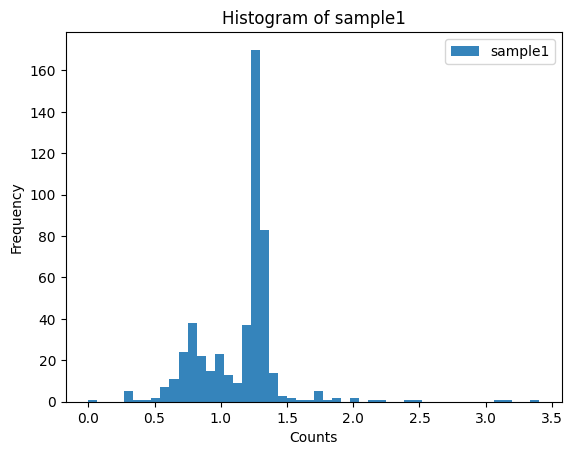

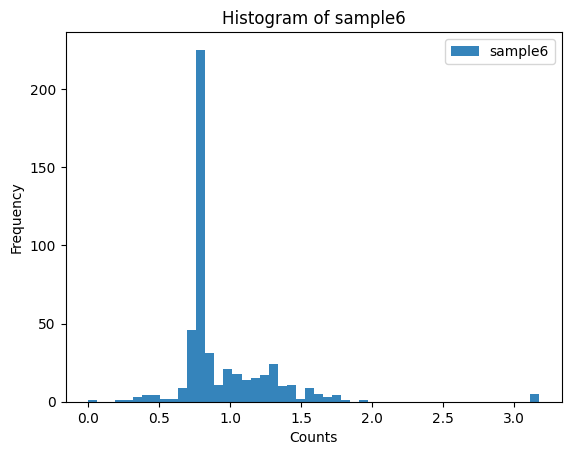

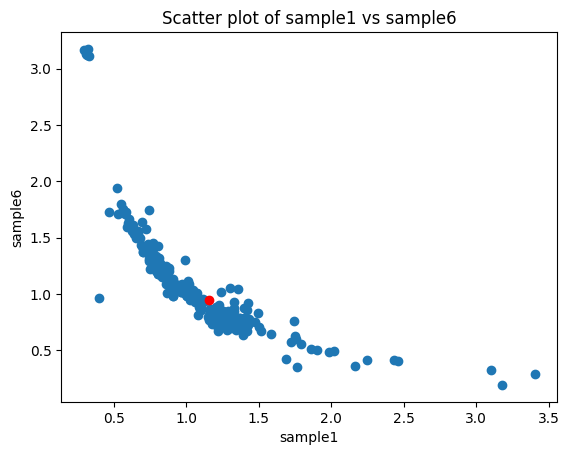

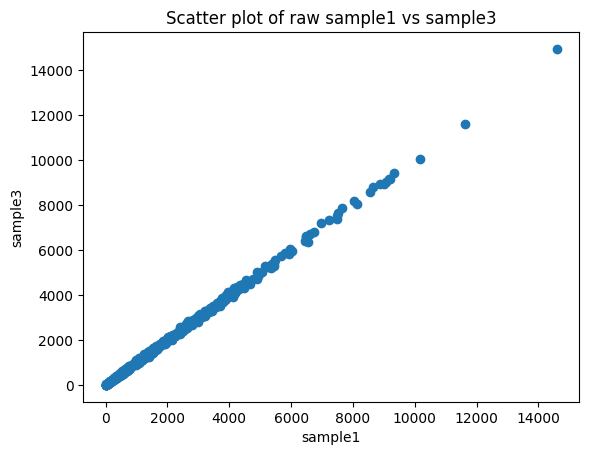

In [76]:
# all 6 samples 
sample1 = np.random.multinomial(1000000, datap)
sample2 = np.random.multinomial(1000000, datap)
sample3 = np.random.multinomial(1000000, datap)
sample4 = np.random.multinomial(1000000, dataq)
sample5 = np.random.multinomial(1000000, dataq)
sample6 = np.random.multinomial(1000000, dataq)
merged_samples = np.vstack((sample1, sample2, sample3))
merged_samples2 = np.vstack((sample4, sample5, sample6))

merged_all = np.vstack((merged_samples, merged_samples2))
Sjg_hat_all, Sj_hat_all = DESeq_normalization(merged_all)

# Remove NaN and inf values
Sjg_hat_all = np.nan_to_num(Sjg_hat_all)

# Histogram for sample 1 and sample 6
plt.figure(1)
plt.hist(Sjg_hat_all[0], bins=50, alpha=0.9, label='sample1')
plt.legend(loc='upper right')
plt.xlabel('Counts')
plt.ylabel('Frequency')

plt.title('Histogram of sample1')
plt.show()

plt.figure(2)
plt.hist(Sjg_hat_all[5], bins=50, alpha=0.9, label='sample6')
plt.legend(loc='upper right')

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram of sample6')
plt.show()


# Scatterplot for sample 1 and sample 6
plt.figure(3)
Sjg_hat_nonzero = Sjg_hat_all[:, (Sjg_hat_all[0] != 0) & (Sjg_hat_all[5] != 0)]
Sjg_hat_all = Sjg_hat_all[:, (Sjg_hat_all[0] != 0) & (Sjg_hat_all[5] != 0)]

# Calculate the center coordinates
center_x = np.mean(Sjg_hat_nonzero[0])
center_y = np.mean(Sjg_hat_nonzero[5])

plt.scatter(Sjg_hat_nonzero[0], Sjg_hat_nonzero[5])
plt.scatter(center_x, center_y, color='red')  # Plot the center as a red dot

plt.xlabel('sample1')
plt.ylabel('sample6')
plt.title('Scatter plot of sample1 vs sample6')
plt.show()


#raw counts for sample 1 and sample 3
plt.figure(4)
plt.scatter(sample1, sample3)
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.title('Scatter plot of raw sample1 vs sample3')
plt.show()
